# Prosper Loan Data Exploration
## by Mahmoud Alaa

## Investigation Overview

We will try to investigate the prosper loan data and try to understand what can affect the Loan status and APR
## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others


In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### What is the frequency and percentage of Loan Status values ?

We Can see from this plot that about 50% of the Loan Status is Current it means that they have recently made a payment 
and 34.1% Completed their payment 
10.7% Charged off and 4.5% Defaulted on their payments


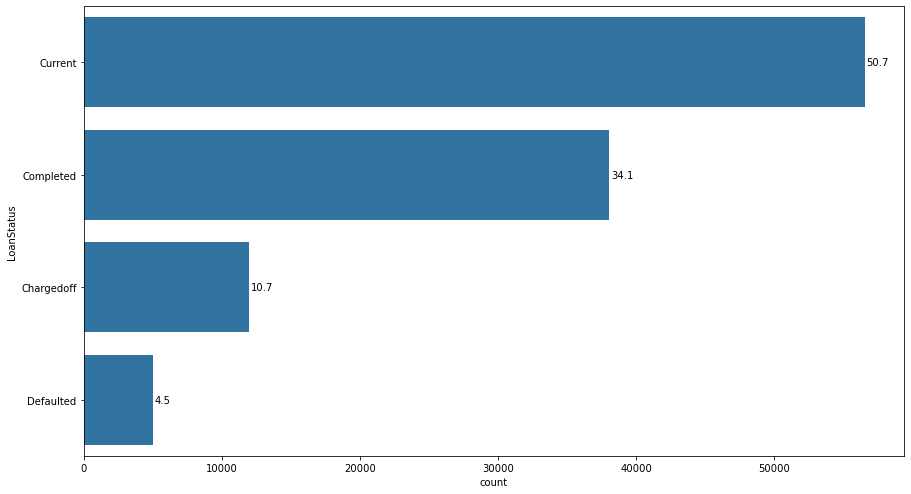

In [14]:
plt.figure(figsize=[14.70, 8.27]);

df = df.query(' LoanStatus == ["Current","Completed","Chargedoff","Defaulted"] ')
n_loanstatus = df['LoanStatus'].value_counts().sum()
type_counts = df['LoanStatus'].value_counts()
type_order = df['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='LoanStatus', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_loanstatus)
    # Print the string value on the bar. 
    plt.text(count+100, i, pct_string, va='center')

### How is the distribution of Annual Percentage Rate looks like ?

We can see that interst rate is between 0.05 and 0.40 for the most of the borrowers 

There is very little number of borrowers with more the 0.4 APR

In the Annual percentage rate which is Interest rate including fees the most frequency APR is about 3.6


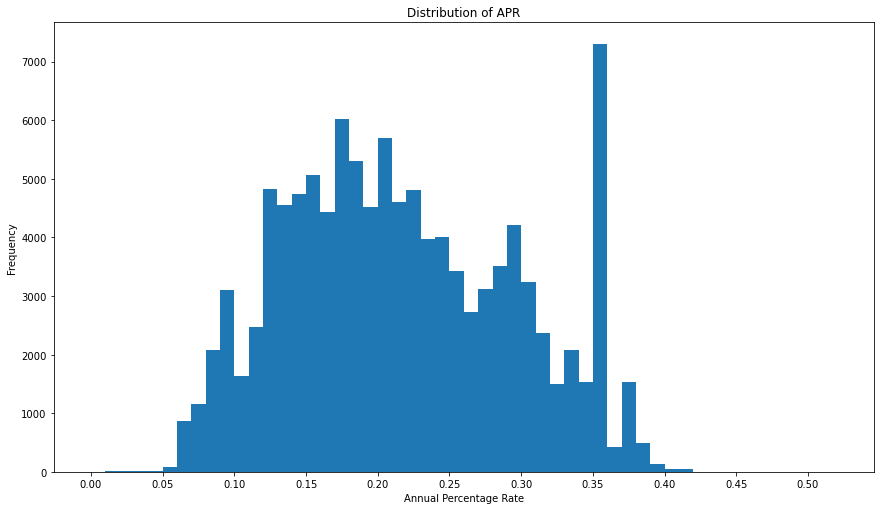

In [15]:
plt.figure(figsize=[14.70, 8.27]);


bins = np.arange(0,df["BorrowerAPR"].max()+0.01,0.01);
plt.hist(df["BorrowerAPR"],bins=bins);
plt.xlabel("Annual Percentage Rate");
plt.title("Distribution of APR");
plt.ylabel("Frequency");
plt.xticks(np.arange(0,0.5+0.05,0.05));


### Is ProsperRating affect the Loan status ?

The Default loans are the lower in the absolute frequency

The absolute relative frequency of The Prosper Rating increase in the Chargedoff and Defaulted loans while The absolute relative frequency of The Prosper Rating is the bigger in the current loan


Text(0.5, 1.0, 'Relative frequency of Loan Status for each Prosper Rating')

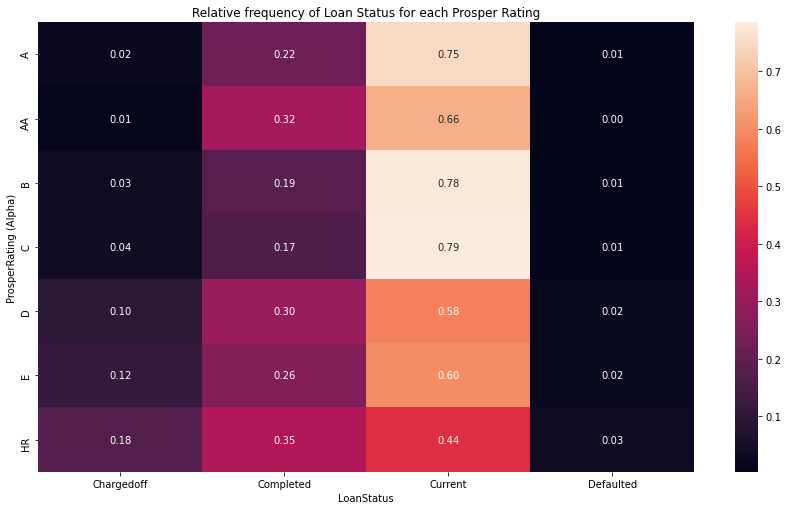

In [16]:
plt.figure(figsize=[14.70, 8.27]);
# relative frequency of Loan Status for each Prosper Rating

df = df.query("EmploymentStatus== ['Employed','Other','Full-time','Retired']")
cg_ls_table = df.groupby('ProsperRating (Alpha)')['LoanStatus'].value_counts(normalize=True).unstack('LoanStatus')
sb.heatmap(cg_ls_table,annot = True, fmt='.2f')
plt.title("Relative frequency of Loan Status for each Prosper Rating")


### Is Employment Status affect the Loan status ?

High porpotion of Retired and Full time employees completed their loans :

58 % of Retired empolyees have completed their Loans

66 % of Full time empolyees have completed their Loans 

High porpotion of Employed and Other employees completed their loans is still current and we can see that :

75 % of Employed borrowers their loan still current

78 % of Other borrowers their loan still current

Text(0.5, 1.0, 'Relative requency of Loan Status for each Employment Status')

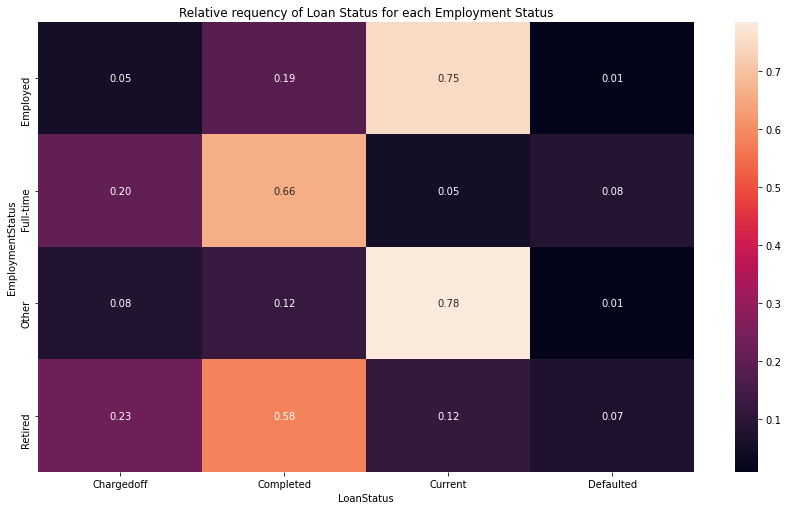

In [17]:
plt.figure(figsize=[14.70, 8.27]);

# relative frequency of Loan Status for each Employment Status

df = df.query("EmploymentStatus== ['Employed','Other','Full-time','Retired']")

es_ls_table = df.groupby('EmploymentStatus')['LoanStatus'].value_counts(normalize=True).unstack('LoanStatus')

sb.heatmap(es_ls_table,annot = True, fmt='.2f')

plt.title("Relative requency of Loan Status for each Employment Status")

### Does the Credit Score affect Annual Percentage Rate ?

We can see if the Credit Score increases the APR decreases 

For Example the credit Score which is between 800 and 850 the most Frequent APR less than 0.1

and when the credit score was between 600 and 650 the Most frequent APR was between 0.15 and 0.35

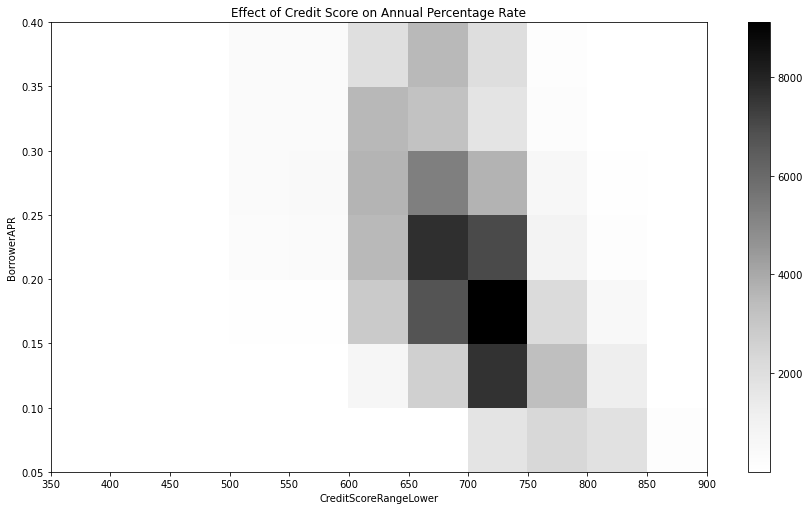

In [18]:
# Credit Score and APR
plt.figure(figsize=[14.70, 8.27]);

bins_x = np.arange(350, 950, 50)
bins_y = np.arange(0.05, 0.4+0.05, 0.05)
plt.hist2d(data = df, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', cmin=0.5, cmap=plt.cm.Greys,bins=[bins_x,bins_y]);
plt.colorbar();
plt.xlabel('CreditScoreRangeLower');
plt.ylabel('BorrowerAPR');
plt.title("Effect of Credit Score on Annual Percentage Rate")
plt.xticks(bins_x);

### What is the relationship between ProsperRating and Borrower Annual Percentage Rate ?

As the prosper rating which represents an estimated average annualized loss rate range to the investor increases,the APR will increase too

they have strong positive correlation

Text(0.5, 1.0, 'Average of APR according to Prosper Rating')

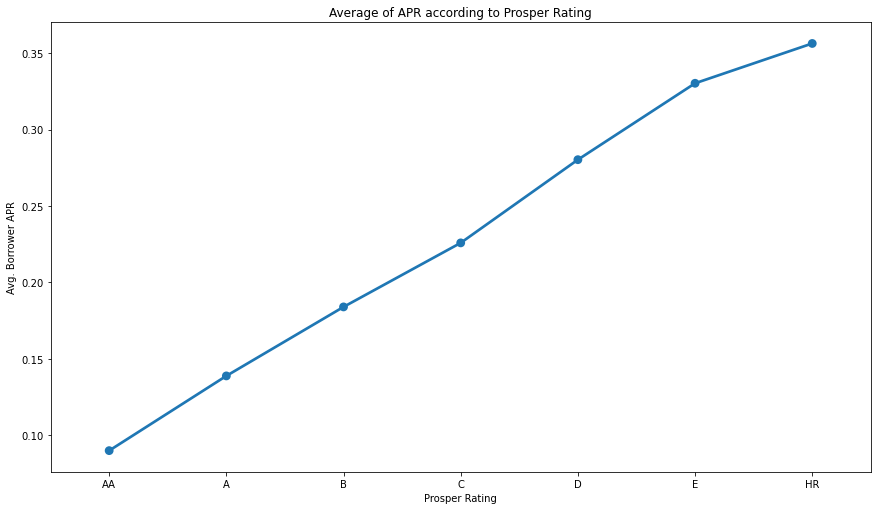

In [19]:
rating = ['AA', 'A', 'B', 'C', 'D','E','HR']
ratings = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ratings);


plt.figure(figsize=[14.70, 8.27]);


sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR');
plt.xlabel('Prosper Rating');
plt.ylabel('Avg. Borrower APR');
plt.title("Average of APR according to Prosper Rating")


### How can Borrower APR be affected by Terms and prosper score ? 

a relative high APR for the lowest prosper score specially in 2 year term

in the one year term with high prosper score we can notice lower APR compared to other terms

Text(0.5, 1.0, 'Borrower APR according to Terms and prosper score')

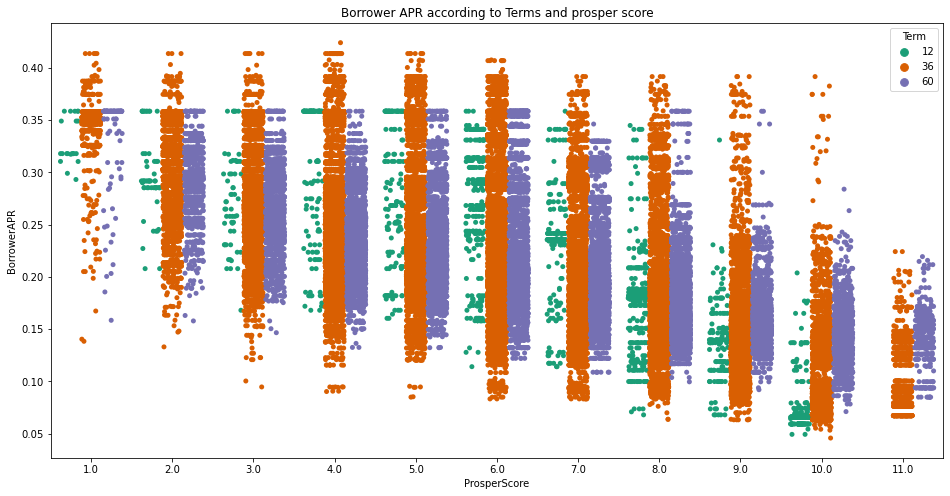

In [20]:
plt.figure(figsize=[16,8])
sb.stripplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',
         jitter = 0.35, dodge = True, palette = "Dark2")
plt.title("Borrower APR according to Terms and prosper score")  

In [21]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt


This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | pattern 'slide_deck_template.ipynb' matched no files


    Default: None
    Equivalent to: [--TemplateExporter.template_file]
--writer=<DottedObjectName>
    Writer class used to write the  results of the conversion
    Default: 'FilesWriter'
    Equivalent to: [--NbConvertApp.writer_class]
--post=<DottedOrNone>
    PostProcessor class used to write the results of the conversion
    Default: ''
    Equivalent to: [--NbConvertApp.postprocessor_class]
--output=<Unicode>
    overwrite base name use for output files. can only be used when converting
    one notebook at a time.
    Default: ''
    Equivalent to: [--NbConvertApp.output_base]
--output-dir=<Unicode>
    Directory to write output(s) to. Defaults to output to the directory of each
    notebook. To recover previous default behaviour (outputting to the current
    working directory) use . as the flag value.
    Default: ''
    Equivalent to: [--FilesWriter.build_directory]
--reveal-prefix=<Unicode>
    The URL prefix for reveal.js (version 3.x). This defaults to the reveal CDN,
    b